In [1]:
import loans
%load_ext autoreload
%autoreload 2
import search
%load_ext autoreload
%autoreload 2
import json
from io import TextIOWrapper
import time
import pandas as pd
import matplotlib.pyplot as plt
loans_points = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
assert loans.Applicant("<25", []).lower_age() == 25
assert loans.Applicant("20-30", []).lower_age() == 20
assert loans.Applicant(">75", []).lower_age() == 75
loans_points += 1

In [3]:
tree = search.BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()

A : [9, 5]
B : [22]
C : [33]


In [4]:
t = search.BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
assert len(t.root) == 4

t.dump()

A : [2]
B : [3]
C : [1, 4]


In [5]:
merchants_bank = loans.Bank("Merchants Bank of Indiana")

In [6]:
#Q1
average_rate = merchants_bank.average_interest_rate()
average_rate

3.2181818181818183

In [7]:
#Q2
total_applicants = sum(len(loan.applicants) for loan in merchants_bank.loan_list)
x = len(merchants_bank.loan_list)
average_applicants = total_applicants / x
average_applicants

1.6724137931034482

In [8]:
#Q3
age_brackets = {
    '<25': 0,
    '25-34': 0,
    '35-44': 0,
    '45-54': 0,
    '55-64': 0,
    '65-74': 0,}

for loan in merchants_bank.loan_list:
    for applicant in loan.applicants:
        age = applicant.age.lower()
        if age.startswith('<'):
            age_brackets['<25'] += 1
        elif age.startswith('>'):
            age_brackets['>74'] += 1
        elif '-' in age:
            lower_bound, upper_bound = map(int, age.split('-'))
            if lower_bound >= 25 and upper_bound <= 34:
                age_brackets['25-34'] += 1
            elif lower_bound >= 35 and upper_bound <= 44:
                age_brackets['35-44'] += 1
            elif lower_bound >= 45 and upper_bound <= 54:
                age_brackets['45-54'] += 1
            elif lower_bound >= 55 and upper_bound <= 64:
                age_brackets['55-64'] += 1
            elif lower_bound >= 65 and upper_bound <= 74:
                age_brackets['65-74'] += 1
age_brackets

{'<25': 2, '25-34': 28, '35-44': 43, '45-54': 16, '55-64': 2, '65-74': 6}

In [9]:
mbi_tree = search.BST()
for loan in merchants_bank.loan_list:
    mbi_tree.add(loan.interest_rate, loan)
print(mbi_tree.root.values)

[<Loan: 3.875% on $135000.0 with 2 applicant(s)>, <Loan: 3.875% on $105000.0 with 2 applicant(s)>]


In [10]:
#Q4
missing = 0
for loan in merchants_bank.loan_list:
    if loan.interest_rate == -1:
        missing += 1
missing    

3

In [11]:
#Q5
def max_depth(node):
    if node is None or (node.left is None and node.right is None):
        return 0
    return 1 + max(max_depth(node.left), max_depth(node.right))
max_depth(mbi_tree.root)

8

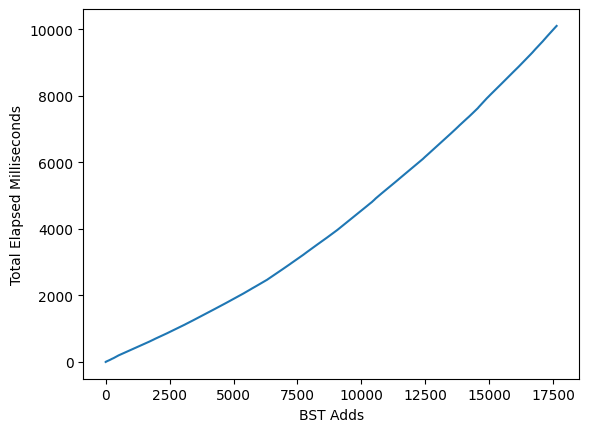

In [12]:
#Q6
lcu = loans.Bank("Landmark Credit Union")

times_df = pd.DataFrame(dtype = float)

t = search.BST()
t0 = time.time()
counter = 0

for l in lcu.loan_list:
    t.add(l.interest_rate, l)
    counter += 1 
    t1 = time.time()
    running_time = (t1 - t0) * 1000
    times_df.at[counter, "Time"] = running_time
    
plot = times_df.plot.line(legend = False)
plot.set_xlabel("BST Adds")
plot.set_ylabel("Total Elapsed Milliseconds")
plt.show()

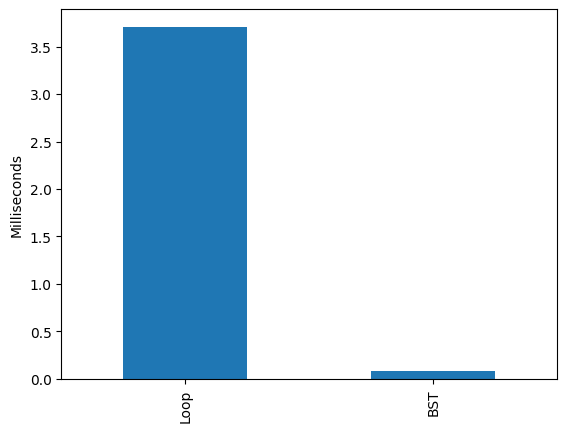

In [13]:
#Q7
timing_df = pd.DataFrame(dtype = float)
tree = search.BST()
for loan in lcu.loan_list:
    tree.add(loan.interest_rate, loan)

count = 0
t0 = time.time()
for loan in lcu.loan_list:
    if loan.interest_rate == 1.99:
        count += 1
t1 = time.time()
loop_time = (t1 - t0) * 1000
timing_df.at["Loop", "Time"] = loop_time

t0 = time.time()
bst_count = len(tree[1.99])
t1 = time.time()
bst_time = (t1 - t0) * 1000
timing_df.at["BST", "Time"] = bst_time

plot = timing_df.plot.bar(legend = False)
plot.set_ylabel("Milliseconds")
plt.show()

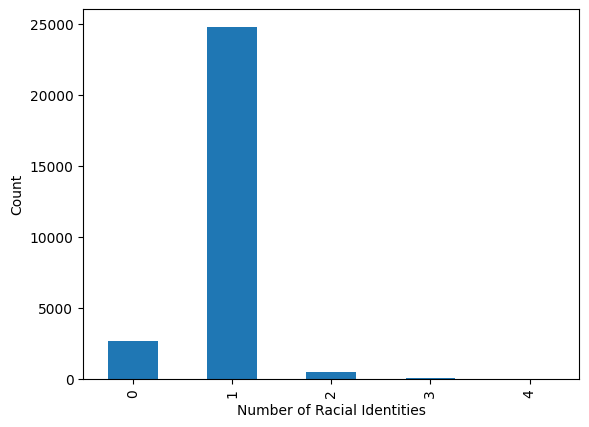

In [14]:
#Q8
racial_identity_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

for loan in lcu.loan_list:
    for applicant in loan.applicants:
        race_count = len(applicant.race)
        if race_count in racial_identity_counts:
            racial_identity_counts[race_count] += 1

df = pd.DataFrame(racial_identity_counts.items(), columns = ['Racial Identities', 'Count'])

plot = df.plot.bar(x = 'Racial Identities', y = 'Count', legend = False)
plot.set_xlabel('Number of Racial Identities')
plot.set_ylabel('Count')
plt.show()

In [15]:
#Q9
def leaf_nodes(node):
    if node is None:
        return 0
    if node.left is None and node.right is None:
        return 1
    return leaf_nodes(node.left) + leaf_nodes(node.right)

bst = search.BST()

for loan in lcu.loan_list:
    bst.add(loan.interest_rate, loan)

leaf_node_count = leaf_nodes(bst.root)
leaf_node_count

63

In [16]:
#Q10
interest_rate_tree = search.BST()
for loan in lcu.loan_list:
    interest_rate_tree.add(loan.interest_rate, loan)

def find_nth_largest(node, n, count):
    if node is None:
        return None, count

    result, count = find_nth_largest(node.right, n, count)

    if result is not None:
        return result, count

    count += 1
    if count == n:
        return node.key, count

    return find_nth_largest(node.left, n, count)

def get_third_largest_rate(tree):
    interest_rate, _ = find_nth_largest(tree.root, 3, 0)
    return interest_rate

third_rate = get_third_largest_rate(interest_rate_tree)
third_rate

9.85